<a href="https://colab.research.google.com/github/ericosmic/2019-CCF-BDCI-OCR-MCZJ-OCR-IdentificationIDElement/blob/master/speech_to_text_model_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

In [0]:
! pip install -q kaggle

In [0]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ericosmo","key":"93f84bd229808bf540217bf44300badc"}'}

In [0]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

In [0]:
!kaggle competitions download -c tensorflow-speech-recognition-challenge

In [3]:
% cd drive/My\ Drive 

/content/drive/My Drive


In [0]:
!ls

In [0]:
#!mkdir tensorflow-speech-recognition-challenge/train
! 7z x tensorflow-speech-recognition-challenge/train.7z 

In [0]:
!mv  train tensorflow-speech-recognition-challenge/

In [0]:
! 7z x tensorflow-speech-recognition-challenge/test.7z 

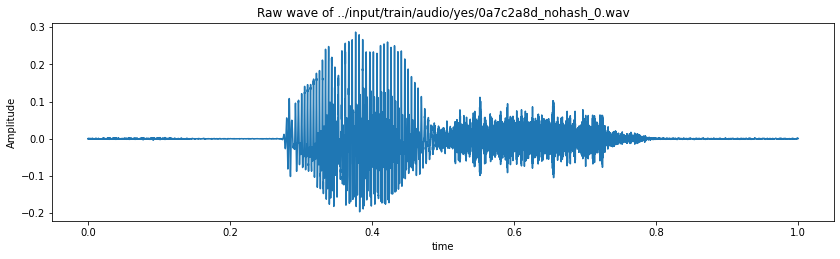

In [0]:
train_audio_path = './tensorflow-speech-recognition-challenge/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [0]:
print('sampels :',samples,'sr :', sample_rate, 'max-value:', max(samples), '\n np.linspace:',np.linspace(0, sample_rate/len(samples), sample_rate))
#np.linspace(0, sample_rate/len(samples), sample_rate)

sampels : [ 0.00042725 -0.00021362 -0.00042725 ...  0.00057983  0.00061035
  0.00082397] sr : 16000 max-value: 0.28720093 
 np.linspace: [0.00000000e+00 6.25039065e-05 1.25007813e-04 ... 9.99874992e-01
 9.99937496e-01 1.00000000e+00]


In [0]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [0]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

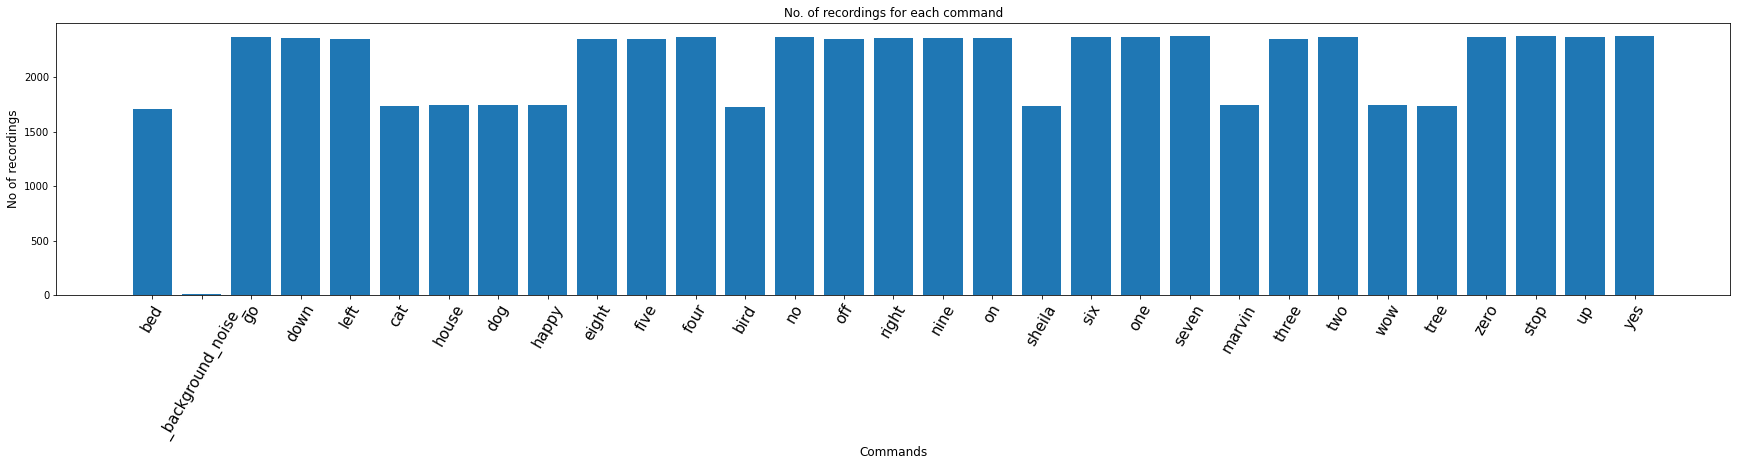

In [0]:
labels=os.listdir(train_audio_path)
train_audio_path = './tensorflow-speech-recognition-challenge/train/audio'
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [0]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [0]:
train_audio_path = './tensorflow-speech-recognition-challenge/train/audio'
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down


In [0]:
!ls

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [0]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [0]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [0]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

## Model Architecture for this problem
We will build the speech-to-text model using conv1d. Conv1d is a convolutional neural network which performs the convolution along only one dimension. 

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
!nvidia-smi

In [0]:
!ls |grep best

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('../../best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('./tensorflow-speech-recognition-challenge/best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

In [0]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [0]:
!ls tensorflow-speech-recognition-challenge

In [0]:
from keras.models import load_model
model=load_model('best_model.hdf5')

In [0]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [0]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

In [0]:
!pip3 install sounddevice 
!apt-get install libportaudio2
!pip3 install soundfile

if happen error during install libprotaudio2: 
the libmkldnn.so.0 is not a softlink.  need to transform the file to a softlink is ok. 

In [0]:
#!mv /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0.bak
!ln -sf /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0   /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so

# Recording youself audio sound clip (durable 1 second),  but the colab not support recording device, so you should do this step in local.

In [0]:
import sounddevice as sd
import soundfile as sf

samplerate = 16000  
duration = 1 # seconds
filename = 'yes.wav'
print("start")
mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
    channels=1, blocking=True)
print("end")
sd.wait()
sf.write(filename, mydata, samplerate)

# Let us now read the saved voice command and convert it to text:

In [0]:
!ls

In [0]:
#os.listdir('../input/voice-commands/prateek_voice_v2')
filepath='./'

#reading the voice commands
samples, sample_rate = librosa.load(filepath + '/' + 'yes.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000)  

predict(samples)